Processing AAPL...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


Processing MSFT...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


Processing GOOGL...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


Processing AMZN...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


Processing TSLA...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


Processing META...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


Processing NVDA...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


Processing JPM...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


Processing DIS...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


Processing NFLX...


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7884\2334530862.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)


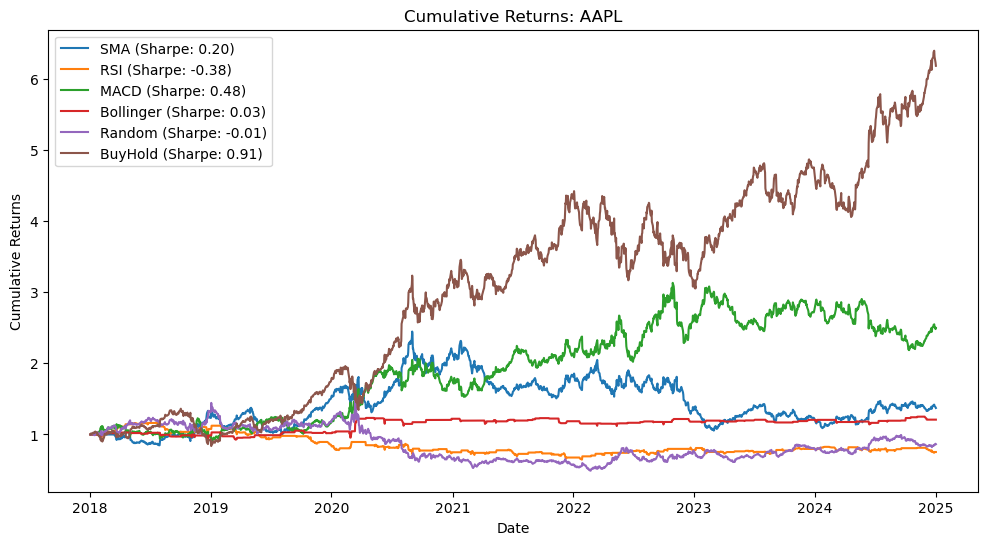

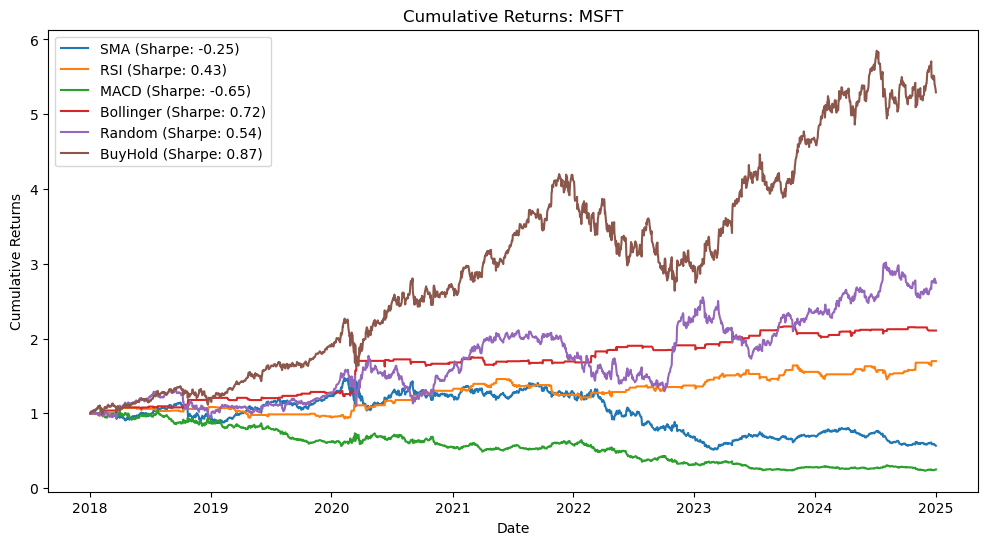

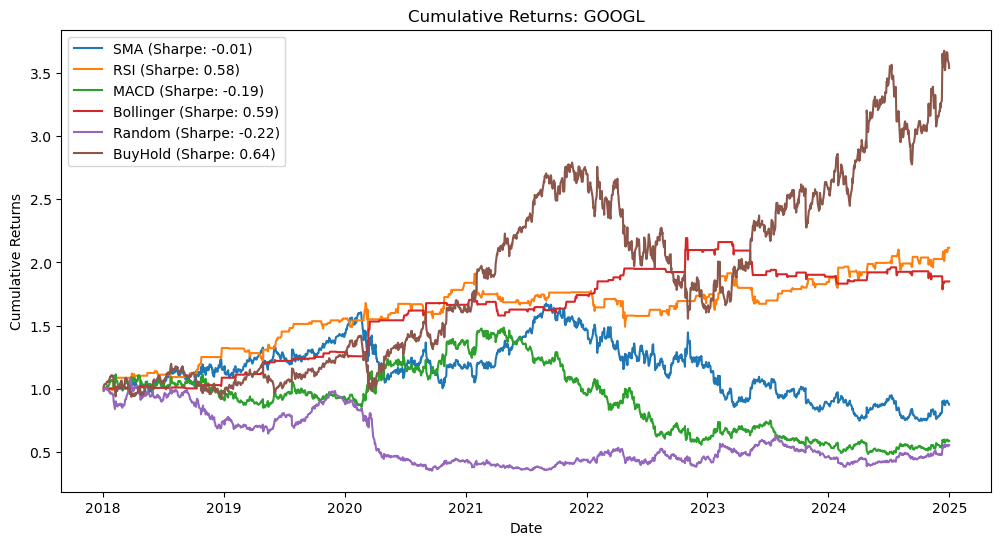

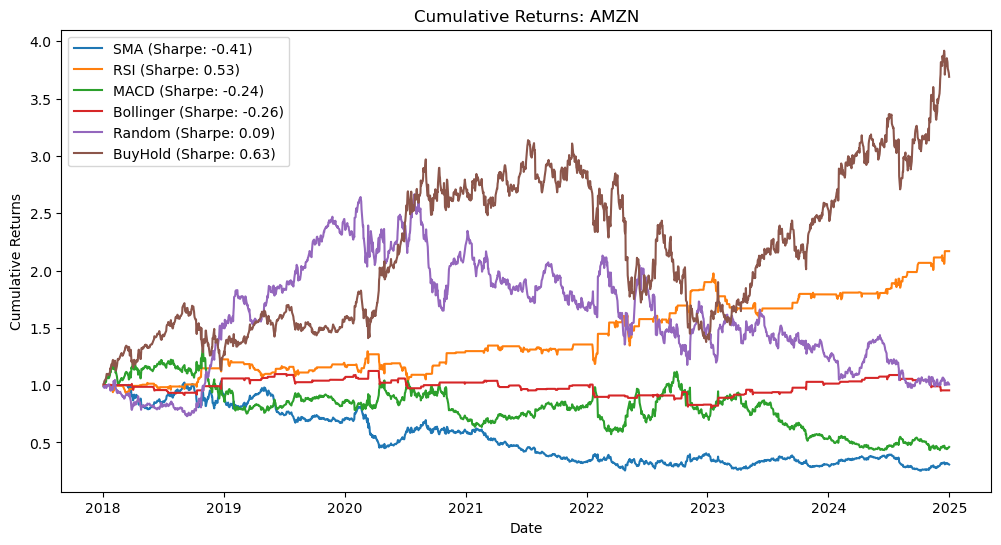

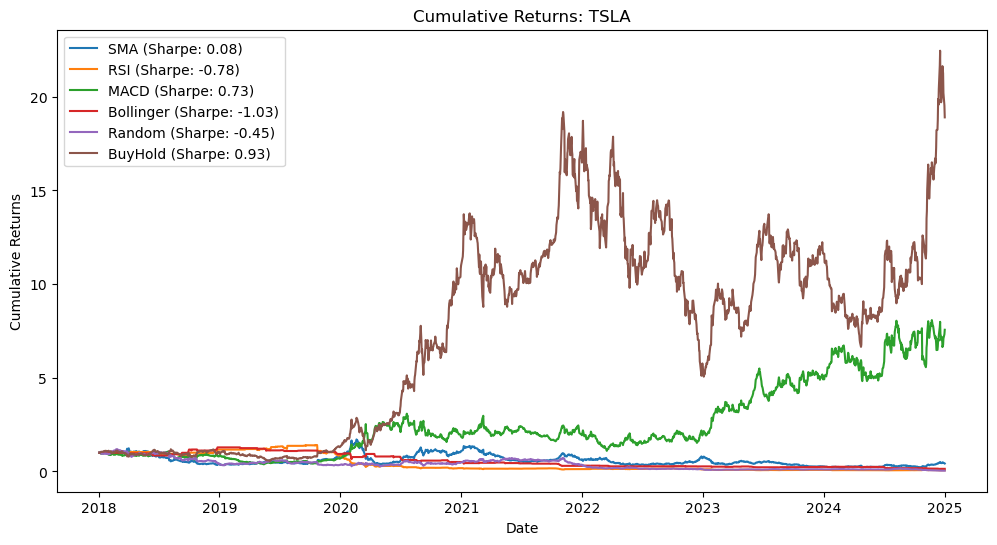

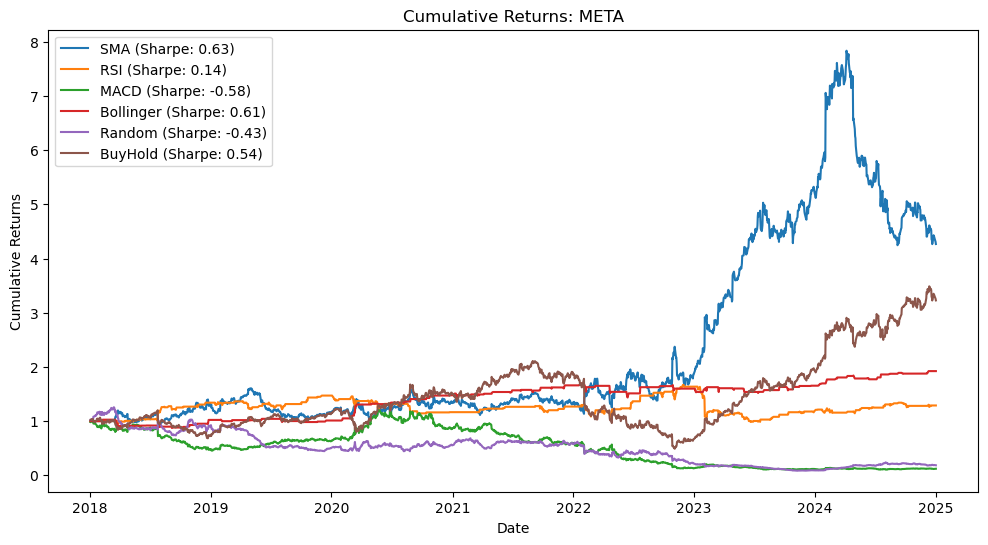

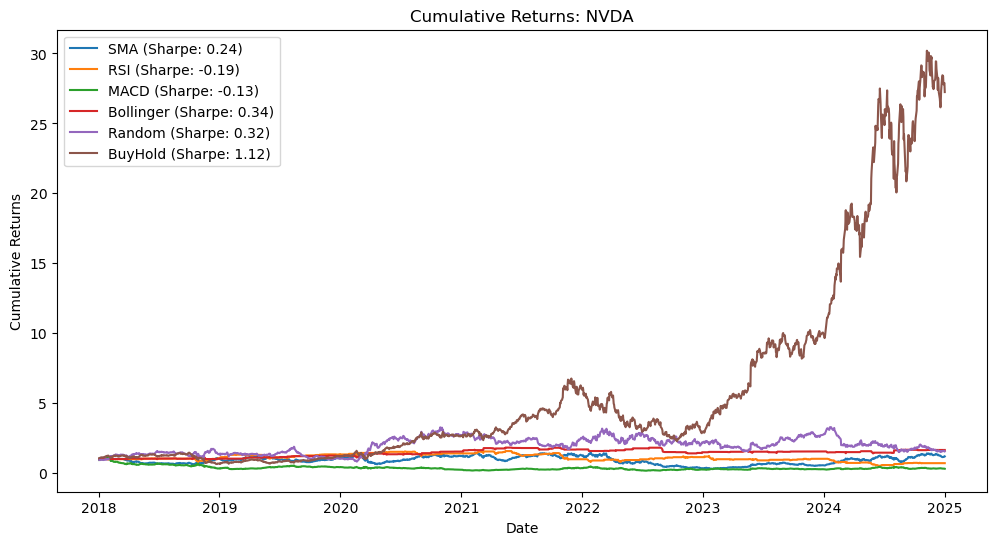

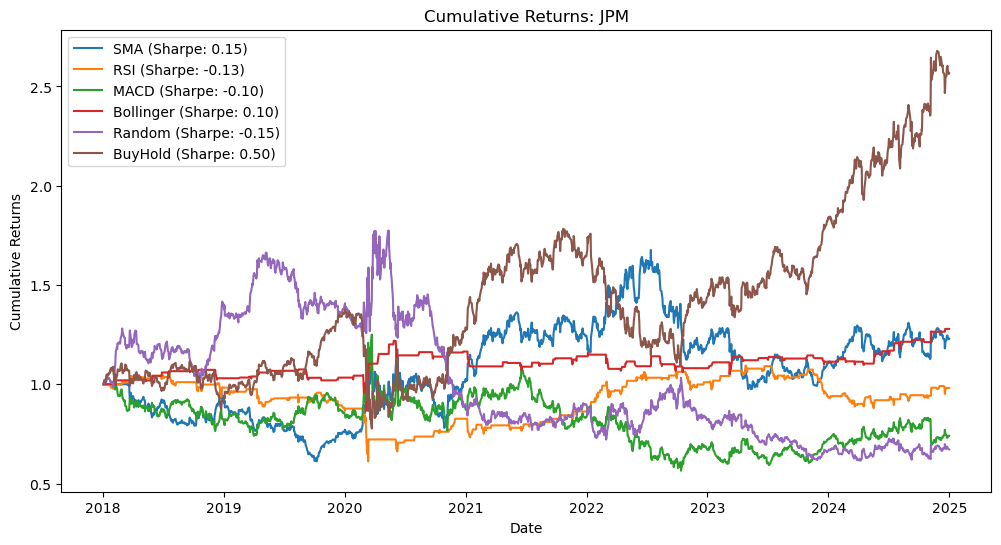

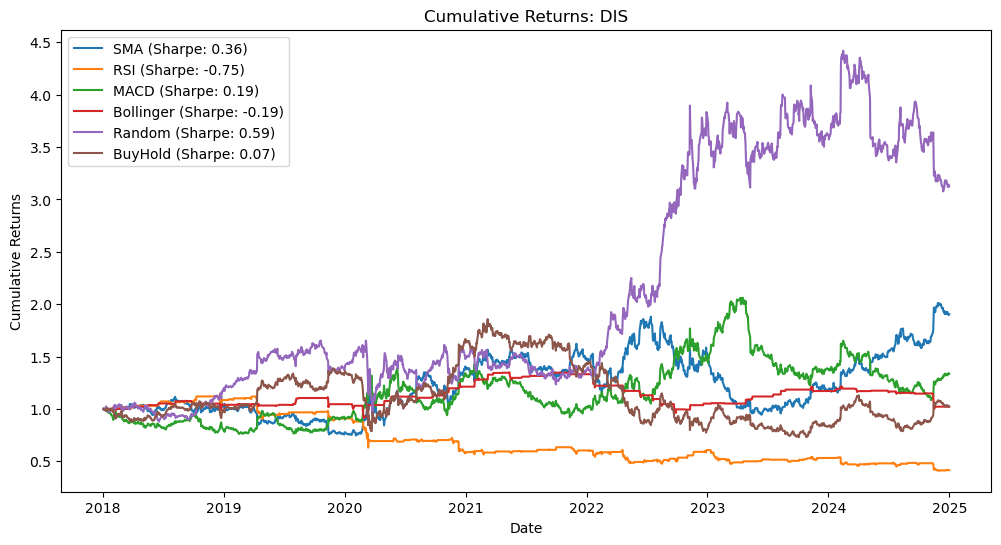

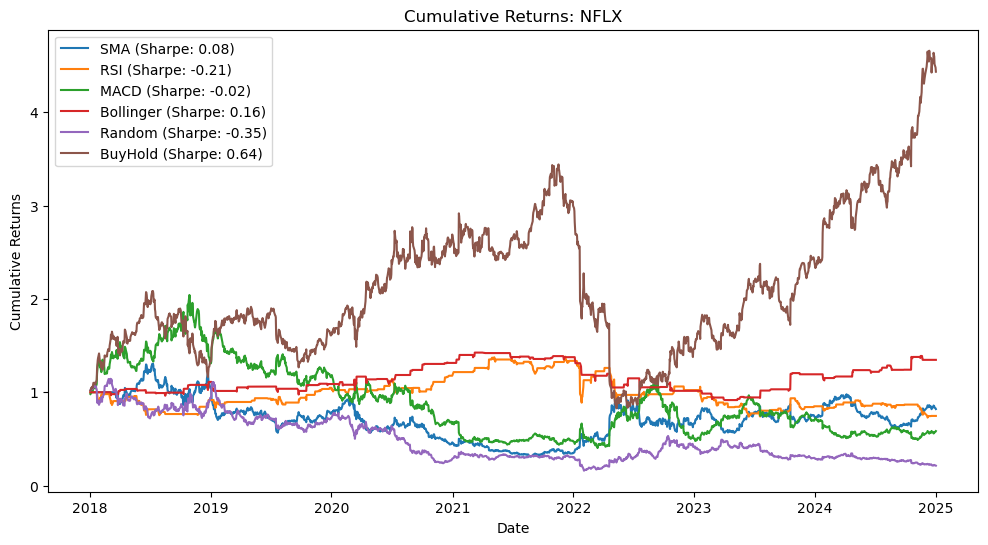

In [9]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random

# CONFIG
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA",
           "META", "NVDA", "JPM", "DIS", "NFLX"]

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2025, 1, 1)
risk_free_rate = 0.03  # annual risk-free rate for Sharpe ratio

# FUNCTIONS

def fetch_stooq_data(ticker):
    df = web.DataReader(ticker, 'stooq', start=start_date, end=end_date)
    df = df.sort_index()  # Stooq returns descending dates
    df.columns = [col.lower() for col in df.columns]
    return df['close']

def sharpe_ratio(returns, freq=252):
    mean = returns.mean() * freq
    std = returns.std() * np.sqrt(freq)
    return (mean - risk_free_rate) / std if std != 0 else np.nan

def sma_crossover_strategy(prices, short_window=20, long_window=50):
    df = pd.DataFrame(prices)
    df['short_sma'] = df['close'].rolling(short_window).mean()
    df['long_sma'] = df['close'].rolling(long_window).mean()
    df['signal'] = 0
    df['signal'][long_window:] = np.where(df['short_sma'][long_window:] > df['long_sma'][long_window:], 1, -1)
    df['returns'] = df['close'].pct_change() * df['signal'].shift(1)
    df['cum_returns'] = (1 + df['returns']).cumprod()
    return df, sharpe_ratio(df['returns'])

def rsi_strategy(prices, window=14, overbought=70, oversold=30):
    df = pd.DataFrame(prices)
    delta = df['close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    df['rsi'] = 100 - (100 / (1 + rs))
    df['signal'] = np.where(df['rsi'] < oversold, 1, np.where(df['rsi'] > overbought, -1, 0))
    df['returns'] = df['close'].pct_change() * df['signal'].shift(1)
    df['cum_returns'] = (1 + df['returns']).cumprod()
    return df, sharpe_ratio(df['returns'])

def macd_strategy(prices, fast=12, slow=26, signal_window=9):
    df = pd.DataFrame(prices)
    df['ema_fast'] = df['close'].ewm(span=fast).mean()
    df['ema_slow'] = df['close'].ewm(span=slow).mean()
    df['macd'] = df['ema_fast'] - df['ema_slow']
    df['signal_line'] = df['macd'].ewm(span=signal_window).mean()
    df['signal'] = np.where(df['macd'] > df['signal_line'], 1, -1)
    df['returns'] = df['close'].pct_change() * df['signal'].shift(1)
    df['cum_returns'] = (1 + df['returns']).cumprod()
    return df, sharpe_ratio(df['returns'])

def bollinger_strategy(prices, window=20, num_std=2):
    df = pd.DataFrame(prices)
    df['sma'] = df['close'].rolling(window).mean()
    df['std'] = df['close'].rolling(window).std()
    df['upper_band'] = df['sma'] + num_std*df['std']
    df['lower_band'] = df['sma'] - num_std*df['std']
    df['signal'] = np.where(df['close'] < df['lower_band'], 1, np.where(df['close'] > df['upper_band'], -1, 0))
    df['returns'] = df['close'].pct_change() * df['signal'].shift(1)
    df['cum_returns'] = (1 + df['returns']).cumprod()
    return df, sharpe_ratio(df['returns'])

def random_strategy(prices):
    df = pd.DataFrame(prices)
    df['signal'] = np.random.choice([1, -1], size=len(df))
    df['returns'] = df['close'].pct_change() * df['signal'].shift(1)
    df['cum_returns'] = (1 + df['returns']).cumprod()
    return df, sharpe_ratio(df['returns'])

def buy_and_hold(prices):
    df = pd.DataFrame(prices)
    df['returns'] = df['close'].pct_change()
    df['cum_returns'] = (1 + df['returns']).cumprod()
    return df, sharpe_ratio(df['returns'])

# MAIN

results = {}

for ticker in tickers:
    print(f"Processing {ticker}...")
    prices = fetch_stooq_data(ticker)
    
    results[ticker] = {
        "SMA": sma_crossover_strategy(prices),
        "RSI": rsi_strategy(prices),
        "MACD": macd_strategy(prices),
        "Bollinger": bollinger_strategy(prices),
        "Random": random_strategy(prices),
        "BuyHold": buy_and_hold(prices)
    }

# PLOTS

for ticker in tickers:
    plt.figure(figsize=(12,6))
    for strategy in ["SMA", "RSI", "MACD", "Bollinger", "Random", "BuyHold"]:
        df, sharpe = results[ticker][strategy]
        plt.plot(df['cum_returns'], label=f"{strategy} (Sharpe: {sharpe:.2f})")
    plt.title(f"Cumulative Returns: {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.show()


In [10]:
# SUMMARY TABLE

summary = []

def max_drawdown(cum_returns):
    """Compute maximum drawdown"""
    roll_max = cum_returns.cummax()
    drawdown = cum_returns / roll_max - 1
    return drawdown.min()

for ticker in tickers:
    for strategy in ["SMA", "RSI", "MACD", "Bollinger", "Random", "BuyHold"]:
        df, sharpe = results[ticker][strategy]
        total_return = df['cum_returns'].iloc[-1] - 1
        mdd = max_drawdown(df['cum_returns'])
        summary.append({
            "Ticker": ticker,
            "Strategy": strategy,
            "Total Return": total_return,
            "Sharpe Ratio": sharpe,
            "Max Drawdown": mdd
        })

summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values(by=['Ticker', 'Total Return'], ascending=[True, False])

# Display table
print(summary_df)

# Export to CSV
summary_df.to_csv("strategy_summary.csv", index=False)


   Ticker   Strategy  Total Return  Sharpe Ratio  Max Drawdown
5    AAPL    BuyHold      5.179563      0.908680     -0.385177
2    AAPL       MACD      1.498432      0.483939     -0.301922
0    AAPL        SMA      0.372563      0.202127     -0.568706
3    AAPL  Bollinger      0.208710      0.027153     -0.102395
4    AAPL     Random     -0.136239     -0.013468     -0.672299
1    AAPL        RSI     -0.246078     -0.381099     -0.442707
23   AMZN    BuyHold      2.690328      0.628259     -0.561451
19   AMZN        RSI      1.169175      0.531758     -0.202209
22   AMZN     Random      0.005675      0.086517     -0.633659
21   AMZN  Bollinger     -0.045496     -0.260280     -0.284776
20   AMZN       MACD     -0.539690     -0.236943     -0.672494
18   AMZN        SMA     -0.692677     -0.411942     -0.755451
52    DIS     Random      2.125070      0.585418     -0.429145
48    DIS        SMA      0.905256      0.356158     -0.498019
50    DIS       MACD      0.335294      0.190686     -0